# Import libraries


In [5]:
import pandas as pd
%pylab inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras import backend as K
import pickle
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Load Dataset

In [6]:
prop = pd.read_csv('propulsion.csv')

print('shape of dataset : ',prop.shape)
prop.head()

shape of dataset :  (10000, 19)


,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


**renaming column names**

In [7]:
old_columns = prop.columns

# renaming column names
prop.columns = ['Unnamed: 0','lp', 'speed', 'GTT', 'GTn', 'GGn','Ts', 'Tp', 'T48','T1', 'T2', 'P48','P1', 'P2',
                'Pexh', 'TIC', 'Fuel', 'Compressor decay', 'Turbine decay']

new_columns = prop.columns

# creating a dictionary which has previous and new column names.
map_column = {}

for i, col in enumerate(new_columns):
    map_column[col] = old_columns[i]
    
map_column

{'Unnamed: 0': 'Unnamed: 0',
 'lp': 'Lever position (lp) [ ]',
 'speed': 'Ship speed (v) [knots]',
 'GTT': 'Gas Turbine shaft torque (GTT) [kN m]',
 'GTn': 'Gas Turbine rate of revolutions (GTn) [rpm]',
 'GGn': 'Gas Generator rate of revolutions (GGn) [rpm]',
 'Ts': 'Starboard Propeller Torque (Ts) [kN]',
 'Tp': 'Port Propeller Torque (Tp) [kN]',
 'T48': 'HP Turbine exit temperature (T48) [C]',
 'T1': 'GT Compressor inlet air temperature (T1) [C]',
 'T2': 'GT Compressor outlet air temperature (T2) [C]',
 'P48': 'HP Turbine exit pressure (P48) [bar]',
 'P1': 'GT Compressor inlet air pressure (P1) [bar]',
 'P2': 'GT Compressor outlet air pressure (P2) [bar]',
 'Pexh': 'Gas Turbine exhaust gas pressure (Pexh) [bar]',
 'TIC': 'Turbine Injecton Control (TIC) [%]',
 'Fuel': 'Fuel flow (mf) [kg/s]',
 'Compressor decay': 'GT Compressor decay state coefficient.',
 'Turbine decay': 'GT Turbine decay state coefficient.'}

In [8]:
prop.describe()

,Unnamed: 0,lp,speed,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,Fuel,Compressor decay,Turbine decay
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2886.89568,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,0.00000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,2499.75000,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,4999.50000,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7499.25000,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9999.00000,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


from above 'describe()' function we can see that

we have 10000 rows of data and ['Unnamed: 0'] has just row number for each row.<br>
variables **'T1'** and **'P1'** contains same value for each row ( 288 and 0.998 respectively ). they both should be dropped as they don't provide any additional information.

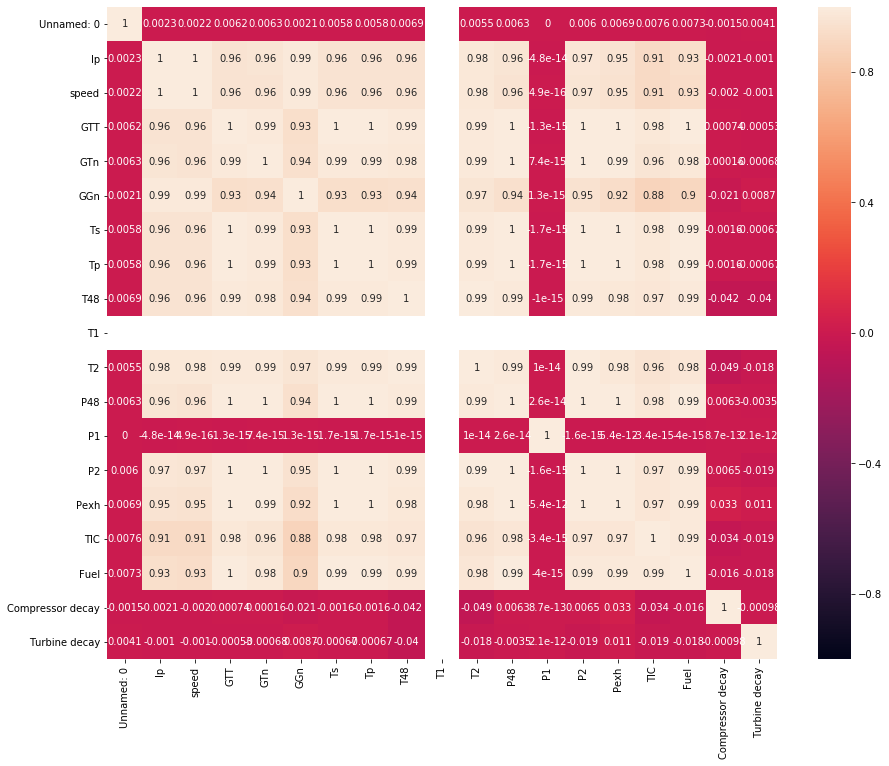

In [9]:
#checking multi-collinearity.

plt.figure(figsize=(15,12))

sns.heatmap( prop.corr(), annot=True, vmin=-1, vmax=1 )

although we have very strong co-relation among all independent features ( <0.9 ). so we will drop only those features with correlation coefficient = 1.( i.e., exactly same )

below variables pairs having corelation coefficient = 1<br>
{ Fuel : GTT }, { pexh : GTT }, { pexh : Tp }, { pexh : P48 }, { pexh : P2 }, { P2 : GTT }, { P2 : GTn }, { P2:Tp }, { P2 : P48},
{ P48 : GTT }, { P48 : GTn }, { P48 : Tp }, { Tp : GTT }, { Ts : GTT }, { speed : lp }, { Tp : Ts }

**therfore some of these columns needs to be dropped beacause they provide no significant information.**

# Feature selection

In [10]:
def drop_features(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)     # row-number
    df.drop(['T1', 'P1'], axis=1, inplace=True)     # Same value
    df.drop(['lp', 'GTT', 'P48', 'Pexh', 'P2', 'Ts'], axis=1, inplace=True)    # multi-collinearity 
    
    
drop_features(prop)

In [11]:
prop.head()

,speed,GTn,GGn,Tp,T48,T2,TIC,Fuel,Compressor decay,Turbine decay
0,27.0,3560.393,9753.812,644.806,1086.583,780.304,90.435,1.790,0.973,0.978
1,18.0,2306.825,8780.012,246.011,776.921,665.511,34.596,0.685,0.995,0.975
2,9.0,1386.739,7051.621,60.318,589.764,580.587,12.477,0.247,0.980,0.978
3,9.0,1386.748,7098.469,60.339,570.651,576.565,11.678,0.231,0.984,1.000
4,18.0,2306.825,8782.024,246.021,769.855,663.682,34.154,0.676,0.998,0.980


**Select x and y**

In [12]:
x = prop.iloc[ : , :-3]
y = prop.iloc[ : , -2:]

In [13]:
def split_train_test( x, y, test_size):
   
    x_train,x_test, y_train, y_test = train_test_split( x,y, test_size= test_size, random_state= 44 )
 
    return x_train, x_test, y_train,y_test

**split train validation and test set.**

In [14]:
x_train, x_test, y_train, y_test = split_train_test(x,y, 0.2)

x_train, x_val, y_train, y_val = split_train_test(x_train ,y_train , x_test.shape[0]/x_train.shape[0])

**finding optimum learning rate.**

In [89]:
# def rmse_loss(y_true, y_pred):
#     return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('loss')< 0.0001):
#             print("\nloss < 0.00001, cancelling training!")
#             self.model.stop_training = True

# callbacks = myCallback()


def get_model(n_inputs, n_outputs, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Lambda(lambda x: x/1000))          # DNN works best with normalized data.
    model.add(tf.keras.layers.Dense(20,input_dim = n_inputs, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='tanh'))
    model.add(tf.keras.layers.Dense(n_outputs))
    model.compile(loss= tf.keras.losses.MeanSquaredError() , optimizer=tf.keras.optimizers.Adam(lr = learning_rate) )
    return model

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5* 10**(epoch/20))


In [90]:
model = get_model( x.shape[1], y.shape[1] , 1e-5)

In [91]:
history = model.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler] )

Epoch 1/100
188/188 [==============================] - 0s 1ms/step - loss: 3.0326 - lr: 1.0000e-05
Epoch 2/100
188/188 [==============================] - 0s 1ms/step - loss: 2.6716 - lr: 1.1220e-05
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 2.2836 - lr: 1.2589e-05
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 1.8862 - lr: 1.4125e-05
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 1.4992 - lr: 1.5849e-05
Epoch 6/100
188/188 [==============================] - 0s 1ms/step - loss: 1.1389 - lr: 1.7783e-05
Epoch 7/100
188/188 [==============================] - 0s 1ms/step - loss: 0.8152 - lr: 1.9953e-05
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: 0.5326 - lr: 2.2387e-05
Epoch 9/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3002 - lr: 2.5119e-05
Epoch 10/100
188/188 [==============================] - 0s 1ms/step - loss: 0.1377 - lr: 2.8184e-05
Epoch 11/

188/188 [==============================] - 0s 1ms/step - loss: 0.0062 - lr: 0.1259
Epoch 84/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0024 - lr: 0.1413
Epoch 85/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0038 - lr: 0.1585
Epoch 86/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0165 - lr: 0.1778
Epoch 87/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0019 - lr: 0.1995
Epoch 88/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0159 - lr: 0.2239
Epoch 89/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0243 - lr: 0.2512
Epoch 90/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0083 - lr: 0.2818
Epoch 91/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0147 - lr: 0.3162
Epoch 92/100
188/188 [==============================] - 0s 1ms/step - loss: 0.0608 - lr: 0.3548
Epoch 93/100
188/188 [==============================]

[1e-05, 0.01, 0.0, 0.01]

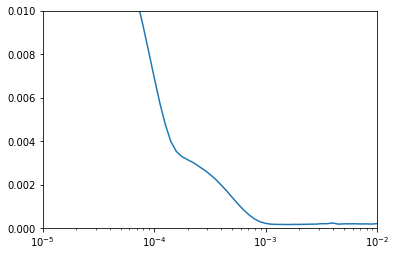

In [92]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-5,1e-2, 0.00, 0.01]) 

we can see our **loss** was decreasing till **1e-3** learning rate. <br>
we should take **lr = 7e-4** for model training purpose where our loss was still decreasing.

In [107]:
final_model = get_model( x.shape[1], y.shape[1] , 7e-4)

In [108]:
history1 = final_model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val))

Epoch 1/600
188/188 [==============================] - 0s 2ms/step - loss: 0.2765 - val_loss: 3.4033e-04
Epoch 2/600
188/188 [==============================] - 0s 2ms/step - loss: 2.9393e-04 - val_loss: 2.4673e-04
Epoch 3/600
188/188 [==============================] - 0s 2ms/step - loss: 2.2831e-04 - val_loss: 2.1163e-04
Epoch 4/600
188/188 [==============================] - 0s 2ms/step - loss: 2.0262e-04 - val_loss: 1.9134e-04
Epoch 5/600
188/188 [==============================] - 0s 2ms/step - loss: 1.9097e-04 - val_loss: 1.8535e-04
Epoch 6/600
188/188 [==============================] - 0s 2ms/step - loss: 1.8294e-04 - val_loss: 1.7807e-04
Epoch 7/600
188/188 [==============================] - 0s 2ms/step - loss: 1.7611e-04 - val_loss: 1.7337e-04
Epoch 8/600
188/188 [==============================] - 0s 2ms/step - loss: 1.7033e-04 - val_loss: 1.6707e-04
Epoch 9/600
188/188 [==============================] - 0s 2ms/step - loss: 1.6679e-04 - val_loss: 1.6342e-04
Epoch 10/600
188/188 [=

188/188 [==============================] - 0s 2ms/step - loss: 1.1104e-04 - val_loss: 1.2974e-04
Epoch 150/600
188/188 [==============================] - 0s 2ms/step - loss: 1.1251e-04 - val_loss: 1.0567e-04
Epoch 151/600
188/188 [==============================] - 0s 2ms/step - loss: 1.1485e-04 - val_loss: 1.1062e-04
Epoch 152/600
188/188 [==============================] - 0s 2ms/step - loss: 1.0925e-04 - val_loss: 1.2627e-04
Epoch 153/600
188/188 [==============================] - 0s 2ms/step - loss: 1.1153e-04 - val_loss: 1.2830e-04
Epoch 154/600
188/188 [==============================] - 0s 2ms/step - loss: 1.1228e-04 - val_loss: 1.2913e-04
Epoch 155/600
188/188 [==============================] - 1s 3ms/step - loss: 1.1587e-04 - val_loss: 1.1585e-04
Epoch 156/600
188/188 [==============================] - 0s 2ms/step - loss: 1.1183e-04 - val_loss: 1.1385e-04
Epoch 157/600
188/188 [==============================] - 0s 2ms/step - loss: 1.1057e-04 - val_loss: 1.0967e-04
Epoch 158/600
1

Epoch 223/600
188/188 [==============================] - 0s 2ms/step - loss: 7.6762e-05 - val_loss: 7.5007e-05
Epoch 224/600
188/188 [==============================] - 0s 2ms/step - loss: 7.8025e-05 - val_loss: 8.0960e-05
Epoch 225/600
188/188 [==============================] - 0s 2ms/step - loss: 7.6117e-05 - val_loss: 6.7839e-05
Epoch 226/600
188/188 [==============================] - 0s 2ms/step - loss: 7.6878e-05 - val_loss: 7.9211e-05
Epoch 227/600
188/188 [==============================] - 1s 3ms/step - loss: 7.5775e-05 - val_loss: 7.0110e-05
Epoch 228/600
188/188 [==============================] - 0s 2ms/step - loss: 7.7515e-05 - val_loss: 7.3049e-05
Epoch 229/600
188/188 [==============================] - 0s 2ms/step - loss: 7.3913e-05 - val_loss: 6.6877e-05
Epoch 230/600
188/188 [==============================] - 0s 2ms/step - loss: 7.4807e-05 - val_loss: 7.2988e-05
Epoch 231/600
188/188 [==============================] - 0s 2ms/step - loss: 7.8619e-05 - val_loss: 6.8555e-05
E

Epoch 370/600
188/188 [==============================] - 0s 2ms/step - loss: 5.2968e-05 - val_loss: 4.5065e-05
Epoch 371/600
188/188 [==============================] - 0s 2ms/step - loss: 5.5152e-05 - val_loss: 6.5212e-05
Epoch 372/600
188/188 [==============================] - 0s 2ms/step - loss: 5.0908e-05 - val_loss: 5.1117e-05
Epoch 373/600
188/188 [==============================] - 0s 2ms/step - loss: 5.7552e-05 - val_loss: 9.3815e-05
Epoch 374/600
188/188 [==============================] - 0s 2ms/step - loss: 5.5424e-05 - val_loss: 4.7629e-05
Epoch 375/600
188/188 [==============================] - 0s 2ms/step - loss: 5.4152e-05 - val_loss: 4.6343e-05
Epoch 376/600
188/188 [==============================] - 0s 2ms/step - loss: 5.3294e-05 - val_loss: 4.7387e-05
Epoch 377/600
188/188 [==============================] - 0s 2ms/step - loss: 5.3515e-05 - val_loss: 5.5862e-05
Epoch 378/600
188/188 [==============================] - 0s 2ms/step - loss: 5.9946e-05 - val_loss: 5.9136e-05
E

Epoch 444/600
188/188 [==============================] - 0s 2ms/step - loss: 5.0174e-05 - val_loss: 5.4461e-05
Epoch 445/600
188/188 [==============================] - 0s 2ms/step - loss: 5.0554e-05 - val_loss: 5.6860e-05
Epoch 446/600
188/188 [==============================] - 0s 2ms/step - loss: 5.4925e-05 - val_loss: 5.5333e-05
Epoch 447/600
188/188 [==============================] - 0s 2ms/step - loss: 5.5553e-05 - val_loss: 4.2880e-05
Epoch 448/600
188/188 [==============================] - 0s 2ms/step - loss: 4.9184e-05 - val_loss: 4.8438e-05
Epoch 449/600
188/188 [==============================] - 0s 2ms/step - loss: 5.3969e-05 - val_loss: 5.0464e-05
Epoch 450/600
188/188 [==============================] - 1s 3ms/step - loss: 5.2154e-05 - val_loss: 7.6555e-05
Epoch 451/600
188/188 [==============================] - 0s 2ms/step - loss: 4.8844e-05 - val_loss: 6.6321e-05
Epoch 452/600
188/188 [==============================] - 0s 2ms/step - loss: 4.8252e-05 - val_loss: 5.3602e-05
E

Epoch 518/600
188/188 [==============================] - 0s 2ms/step - loss: 5.1364e-05 - val_loss: 4.3190e-05
Epoch 519/600
188/188 [==============================] - 0s 2ms/step - loss: 5.0341e-05 - val_loss: 4.3630e-05
Epoch 520/600
188/188 [==============================] - 0s 2ms/step - loss: 5.1797e-05 - val_loss: 4.8608e-05
Epoch 521/600
188/188 [==============================] - 1s 4ms/step - loss: 4.8914e-05 - val_loss: 4.5179e-05
Epoch 522/600
188/188 [==============================] - 1s 3ms/step - loss: 4.9639e-05 - val_loss: 5.0005e-05
Epoch 523/600
188/188 [==============================] - 1s 3ms/step - loss: 4.6780e-05 - val_loss: 7.5836e-05
Epoch 524/600
188/188 [==============================] - 0s 2ms/step - loss: 4.8854e-05 - val_loss: 6.3996e-05
Epoch 525/600
188/188 [==============================] - 0s 2ms/step - loss: 4.9389e-05 - val_loss: 4.5412e-05
Epoch 526/600
188/188 [==============================] - 0s 2ms/step - loss: 4.8738e-05 - val_loss: 4.6128e-05
E

Epoch 592/600
188/188 [==============================] - 0s 2ms/step - loss: 4.6603e-05 - val_loss: 6.0446e-05
Epoch 593/600
188/188 [==============================] - 0s 2ms/step - loss: 4.7734e-05 - val_loss: 4.8932e-05
Epoch 594/600
188/188 [==============================] - 0s 2ms/step - loss: 4.7275e-05 - val_loss: 4.2753e-05
Epoch 595/600
188/188 [==============================] - 0s 2ms/step - loss: 4.8085e-05 - val_loss: 5.1886e-05
Epoch 596/600
188/188 [==============================] - 0s 2ms/step - loss: 4.7598e-05 - val_loss: 6.2128e-05
Epoch 597/600
188/188 [==============================] - 0s 2ms/step - loss: 5.0574e-05 - val_loss: 5.2707e-05
Epoch 598/600
188/188 [==============================] - 0s 2ms/step - loss: 4.9800e-05 - val_loss: 4.8224e-05
Epoch 599/600
188/188 [==============================] - 0s 2ms/step - loss: 5.6270e-05 - val_loss: 5.3534e-05
Epoch 600/600
188/188 [==============================] - 0s 2ms/step - loss: 4.9654e-05 - val_loss: 4.5215e-05


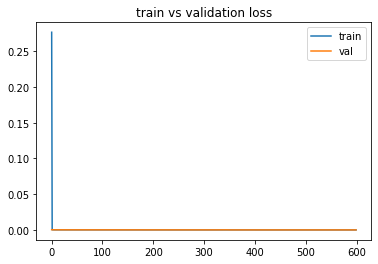

In [109]:
def get_plots(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('train vs validation loss')
    plt.legend()
    plt.show()
    
get_plots(history1)

[0, 500, 0, 0.0002]

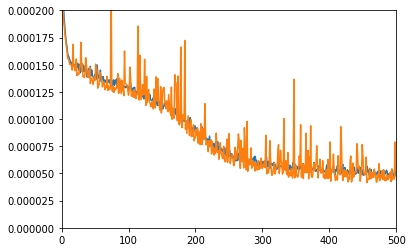

In [110]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='train')
plt.axis([ 0,500,0,0.0002])

**Although in previous plot it looked like that our loss has flattened but when we zoomed it we can see our loss was still decreasing.**

# Model evaluation on test set

In [1]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_pred - y_true)))


def model_evaluation(model, x, y ):
    pred = model.predict(x)
    print(' rmse : ', rmse(y, pred))

In [111]:
model_evaluation(final_model, x_test, y_test)

 rmse :  Compressor decay    0.006927
Turbine decay       0.006471
dtype: float64


***SAVE MODEL***

In [132]:
final_model.save(r'C:\Users\acer\Downloads\Compressed\ML projects\model_propulsion.h5')

INFO:tensorflow:Assets written to: C:\Users\acer\Downloads\Compressed\ML projects\model_propulsion.py\assets
